# Load AERONET data
Like from here: https://aeronet.gsfc.nasa.gov/cgi-bin/data_display_aod_v3?site=Univ_of_Lethbridge&nachal=0&year=2017&aero_water=0&level=3&if_day=0&if_err=0&place_code=10&year_or_month=1

Use level 2.0 AOD data

# NOTE: Any use of this data should have the acknowledgment:
"We thank Craig Coburn for the effort of establishing and maintaining the University of Lethbridge AERONET site"

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import xarray as xr
import glob

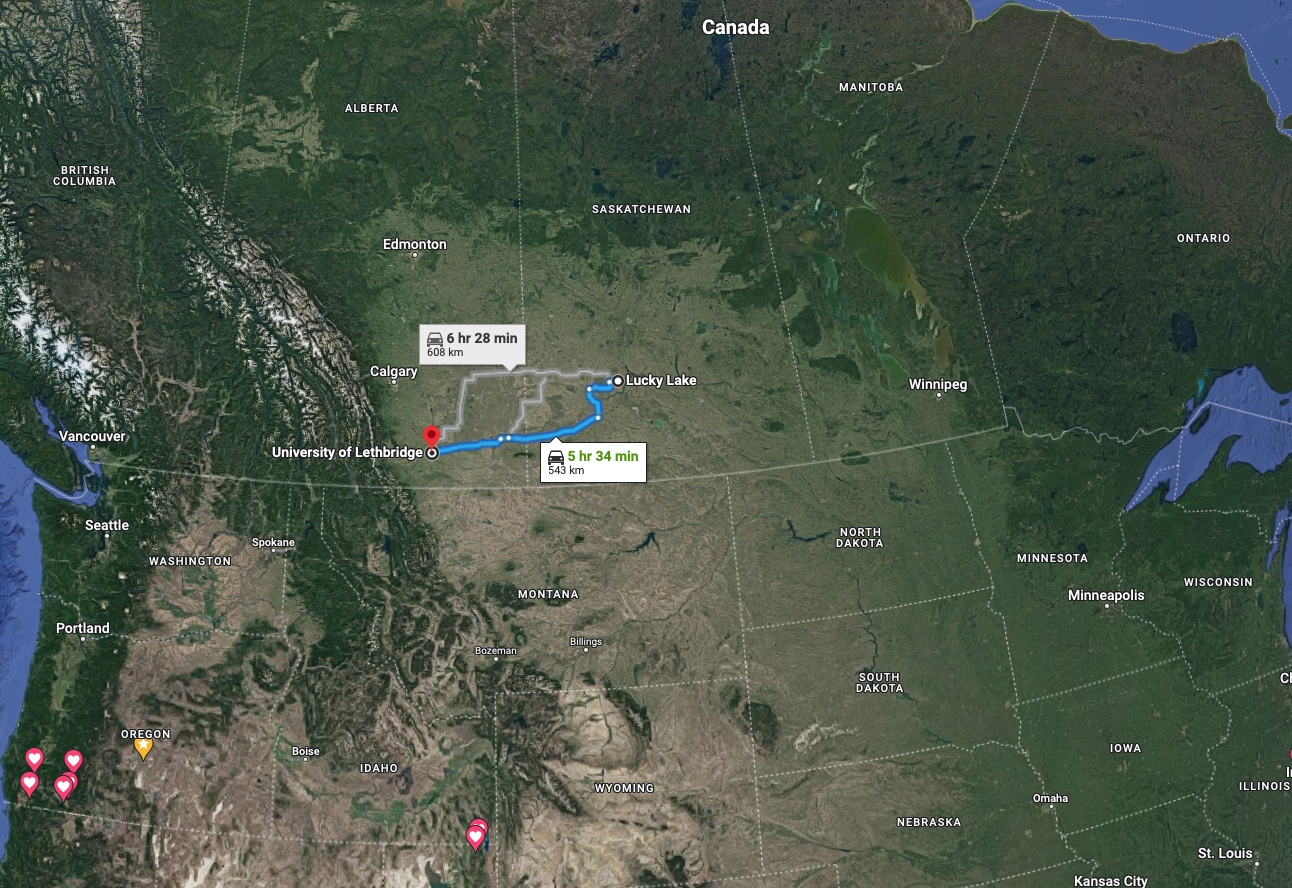

#### Scratchpad

In [19]:
# %cat 20160101_20161231_Univ_of_Lethbridge.lev20

In [4]:
aeronet_fn = '20160101_20161231_Univ_of_Lethbridge.lev20'

dfi = pd.read_csv(aeronet_fn, sep=',', skiprows=6, usecols=range(0,26))

# Parse time
s = ['%s %s' % (dfi.iloc[i,0], dfi.iloc[i,1]) for i in range(len(dfi.index))]
t = pd.to_datetime(s, format='%d:%m:%Y %H:%M:%S')

# Set index to time and only keep relevant columns
df = dfi.set_index(t).iloc[:,4:] 
df[df < -990] = np.nan # Set -999 to NaN

# Wavelength
lam = [float(s.split('_')[-1][:-2]) for s in df.columns]

# Convert to xarray
dsa = xr.DataArray(data=df.values, dims=['time','lam'], coords = {'lam':lam, 'time':t})

<IPython.core.display.Javascript object>


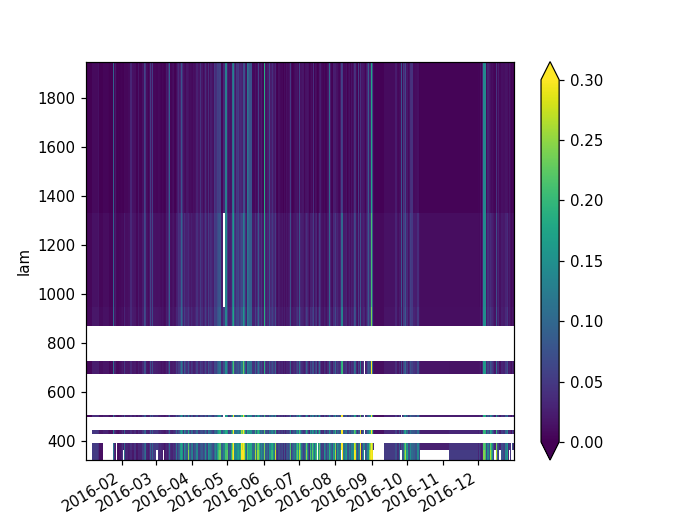

In [5]:
dsa.T.plot(vmin=0.0, vmax=0.3)

#### Make into function

In [6]:
def read_aeronet(fn):

    dfi = pd.read_csv(fn, sep=',', skiprows=6, usecols=range(0,26))

    # Parse time
    s = ['%s %s' % (dfi.iloc[i,0], dfi.iloc[i,1]) for i in range(len(dfi.index))]
    t = pd.to_datetime(s, format='%d:%m:%Y %H:%M:%S')

    # Set index to time and only keep relevant columns
    df = dfi.set_index(t).iloc[:,4:] 
    df[df < -990] = np.nan # Set -999 to NaN

    # Wavelength
    lam = [float(s.split('_')[-1][:-2]) for s in df.columns]

    # Convert to xarray
    ds = xr.DataArray(data=df.values, dims=['time','lam'], coords = {'lam':lam, 'time':t})  
    
    # Sort by wavlength
    ds = ds.sortby('lam')
    
    return ds

In [8]:
fns = glob.glob('*.lev20')
dss = []
for fn in fns:
    print(fn)
    dss.append(read_aeronet(fn))
dsa = xr.concat(dss, dim='time')

# Drop wavelengths that have no data (why are they even reported?)
dsa = dsa.dropna(dim='lam', how='all')

# Drop wavelengths we don't care about
dsa = dsa.sel(lam=slice(None, 1100))

20160101_20161231_Univ_of_Lethbridge.lev20
20170101_20171231_Univ_of_Lethbridge.lev20
20180101_20181231_Univ_of_Lethbridge.lev20


<IPython.core.display.Javascript object>


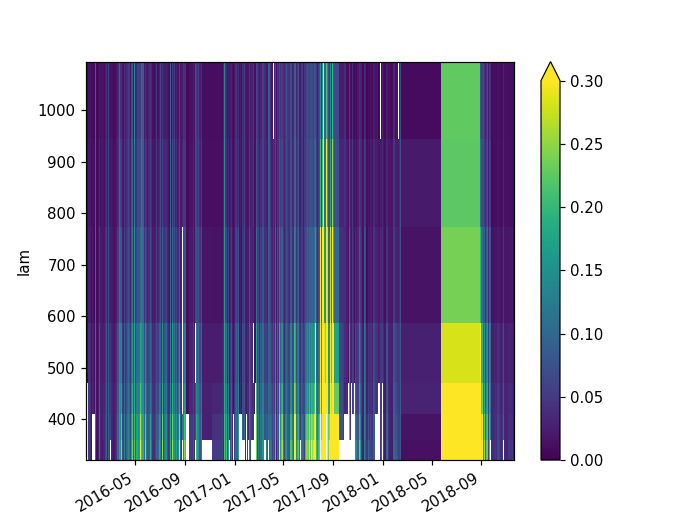

In [9]:
plt.figure()
dsa.T.plot(vmin=0.0, vmax=0.3)

<IPython.core.display.Javascript object>


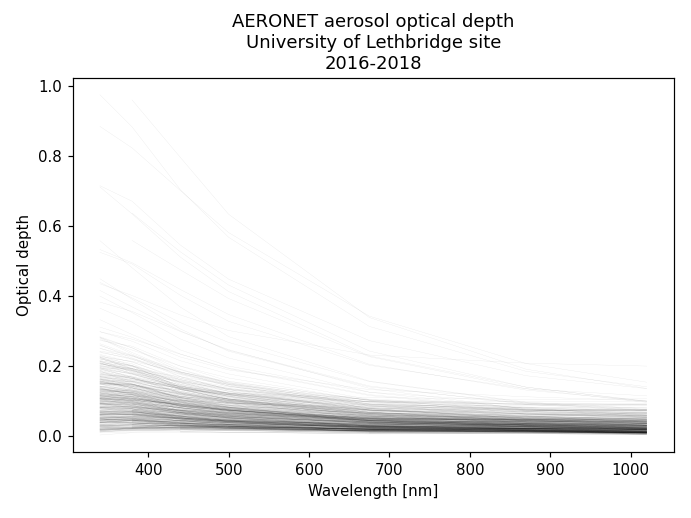

In [11]:
d = dsa.sel(time=slice(None,None,50))

plt.figure()
plt.plot(d.lam, d.T, 'k-', lw=0.2, alpha=0.1);
plt.xlabel('Wavelength [nm]')
plt.title('AERONET aerosol optical depth\nUniversity of Lethbridge site\n2016-2018')
plt.ylabel('Optical depth')
plt.tight_layout()

#### Rayleigh scattering excerpt from Bodhaine et al (1999)

In [12]:
s1 = """
0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295
0.300 0.305 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345
0.350 0.355 0.360 0.365 0.370 0.375 0.380 0.385 0.390 0.395
0.400 0.405 0.410 0.415 0.420 0.425 0.430 0.435 0.440 0.445
0.450 0.455 0.460 0.465 0.470 0.475
0.480 0.485 0.490 0.495 0.500 0.505 0.510 0.515 0.520 0.525
0.530 0.535 0.540 0.545 0.550 0.555
0.560 0.565 0.570 0.575 0.580 0.585 0.590 0.595 0.600 0.605
0.610 0.615 0.620 0.625 0.630 0.635 0.640 0.645 0.650 0.655
0.660 0.665 0.670 0.675 0.680 0.685 0.690 0.695 0.700 0.705
0.710 0.715 0.720 0.725 0.730 0.735 0.740 0.745 0.750 0.755
0.760 0.765 0.770 0.775 0.780 0.785
0.790 0.795 0.800 0.805 0.810 0.815 0.820 0.825 0.830 0.835
0.840 0.845 0.850 0.855 0.860 0.865 0.870 0.875 0.880
0.885 0.900 0.905 0.910 0.915 0.920 0.925 0.930 0.935 0.940 0.945 0.950 0.955
0.960 0.965 0.970 0.975 0.980 0.985 0.990 0.995 1.000
"""

s2 = """
2.7137E⫹00 2.4828E⫹00 2.2766E⫹00 2.0919E⫹00 1.9260E⫹00 1.7766E⫹00 1.6416E⫹00 1.5195E⫹00 1.4088E⫹00 1.3081E⫹00
1.2164E⫹00 1.1328E⫹00 1.0563E⫹00 9.8629E⫺01 9.2206E⫺01 8.6304E⫺01 8.0873E⫺01 7.5868E⫺01 7.1249E⫺01 6.6981E⫺01
6.3031E⫺01 5.9372E⫺01 5.5977E⫺01 5.2824E⫺01 4.9892E⫺01 4.7162E⫺01 4.4619E⫺01 4.2246E⫺01 4.0030E⫺01 3.7959E⫺01
3.6022E⫺01 3.4207E⫺01 3.2506E⫺01 3.0910E⫺01 2.9412E⫺01 2.8004E⫺01 2.6680E⫺01 2.5434E⫺01 2.4261E⫺01 2.3154E⫺01
2.2111E⫺01 2.1126E⫺01 2.0195E⫺01 1.9316E⫺01 1.8484E⫺01 1.7696E⫺01
1.6951E⫺01 1.6244E⫺01 1.5574E⫺01 1.4939E⫺01 1.4336E⫺01 1.3763E⫺01 1.3218E⫺01 1.2700E⫺01 1.2208E⫺01 1.1739E⫺01
1.1293E⫺01 1.0868E⫺01 1.0462E⫺01 1.0076E⫺01 9.7069E⫺02 9.3549E⫺02
9.0188E⫺02 8.6977E⫺02 8.3908E⫺02 8.0974E⫺02 7.8168E⫺02 7.5483E⫺02 7.2912E⫺02 7.0450E⫺02 6.8092E⫺02 6.5831E⫺02
6.3664E⫺02 6.1586E⫺02 5.9592E⫺02 5.7679E⫺02 5.5842E⫺02 5.4078E⫺02 5.2383E⫺02 5.0754E⫺02 4.9188E⫺02 4.7682E⫺02
4.6234E⫺02 4.4840E⫺02 4.3498E⫺02 4.2207E⫺02 4.0963E⫺02 3.9765E⫺02 3.8610E⫺02 3.7497E⫺02 3.6424E⫺02 3.5390E⫺02
3.4392E⫺02 3.3428E⫺02 3.2499E⫺02 3.1601E⫺02 3.0735E⫺02 2.9898E⫺02 2.9089E⫺02 2.8308E⫺02 2.7552E⫺02 2.6822E⫺02
2.6116E⫺02 2.5433E⫺02 2.4772E⫺02 2.4132E⫺02 2.3514E⫺02 2.2914E⫺02
2.2334E⫺02 2.1772E⫺02 2.1228E⫺02 2.0701E⫺02 2.0190E⫺02 1.9694E⫺02 1.9214E⫺02 1.8749E⫺02 1.8297E⫺02 1.7859E⫺02
1.7434E⫺02 1.7022E⫺02 1.6621E⫺02 1.6233E⫺02 1.5855E⫺02 1.5489E⫺02 1.5133E⫺02 1.4788E⫺02 1.4452E⫺02
1.4126E⫺02 1.3200E⫺02 1.2909E⫺02 1.2626E⫺02 1.2350E⫺02 1.2082E⫺02 1.1821E⫺02 1.1567E⫺02 1.1320E⫺02 1.1079E⫺02 1.0845E⫺02 1.0617E⫺02 1.0395E⫺02
1.0179E⫺02 9.9682E⫺03 9.7629E⫺03 9.5630E⫺03 9.3681E⫺03 9.1782E⫺03 8.9930E⫺03 8.8125E⫺03 8.6366E⫺03
"""

In [13]:
lam = [float(x)*1e3 for x in s1.split()]

In [14]:
ss = s2.split()
b = np.array([float(x[:6]) for x in ss])
e = np.array([-int(x[-2:]) for x in ss])
tau = b * 10.**e
dsr = xr.DataArray(data=tau, dims=['lam'], coords = {'lam':lam})  
dsr = dsr.sel(lam=slice(340, None))

dsaq = dsa.quantile(q=[0.5, 0.75, 0.9], dim='time')

<IPython.core.display.Javascript object>


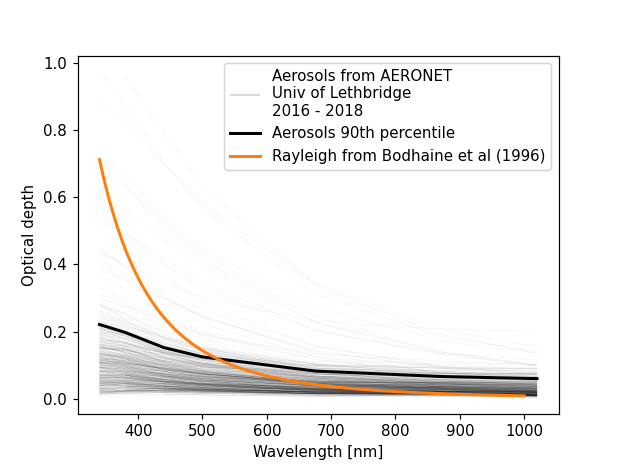

In [15]:
plt.figure()
plt.plot(dsa.lam, dsa.T.sel(time=slice(None,None,50)), 'k-', lw=0.2, alpha=0.1, label='');
plt.plot([],[], 'k-', lw=0.2, alpha=1, label='Aerosols from AERONET\nUniv of Lethbridge\n2016 - 2018');
plt.plot(dsaq.lam, dsaq.sel(quantile=0.9), 'k-', lw=2, alpha=1, label='Aerosols 90th percentile');
plt.plot(dsr.lam, dsr, 'C1-', lw=2, label='Rayleigh from Bodhaine et al (1996)');
plt.xlabel('Wavelength [nm]')
plt.ylabel('Optical depth')
plt.legend()

# Transmission calculation

Plane parallel approximation: $$ T = \exp\left(-\frac{\tau}{\cos \theta}\right) $$

In [16]:
th = 45 # 45 deg angle

# Define aerosol and rayleigh optical depths to use
tau_aero = dsaq.sel(quantile=0.9)
tau_rayl = dsr
# Interpolate and add
tau = tau_aero.interp(lam=dsr.lam) + tau_rayl

T = np.exp(-tau/np.cos(th*np.pi/180.))

<IPython.core.display.Javascript object>


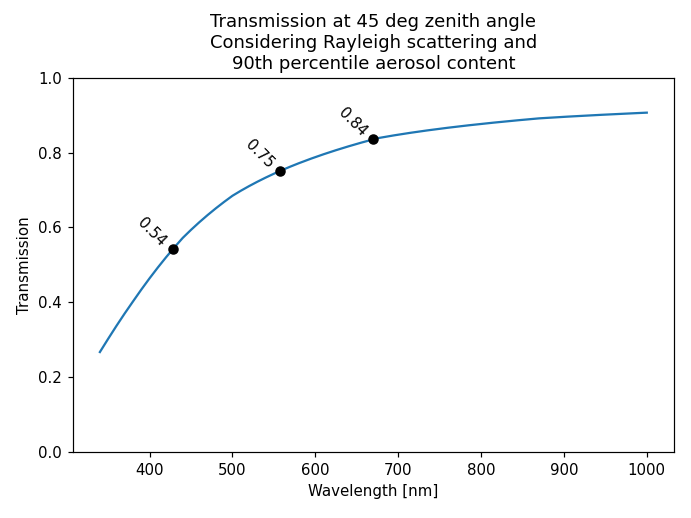

In [18]:
plt.figure()
plt.plot(T.lam, T)
for lam in [427.8, 557.7, 670]:
    Ti = T.interp(lam=lam)
    plt.plot(lam, Ti , 'ko')
    plt.text(lam, Ti, '%.2f ' % Ti, rotation=-45, ha='right')
plt.ylim((0,1))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission')
plt.title('Transmission at %.0f deg zenith angle\nConsidering Rayleigh scattering and\n90th percentile aerosol content' % th)
plt.tight_layout()

# Comparison to Morrill et al. (1998)
 - Morrill accounted for Rayleigh scattering but also included absorption by ozone, oxygen, and water vapor. 
  - (Bodhaine et al. (1999) calculations of optical depth are for dry air)
 - No mention of aerosols
 - Uses MODTRAN Midlatitude Summer model

In [ ]:
th = 53.1 # (Table 1, 100 km path, 0 km observer)
T = np.exp(-tau/np.cos(th*np.pi/180.))

<IPython.core.display.Javascript object>


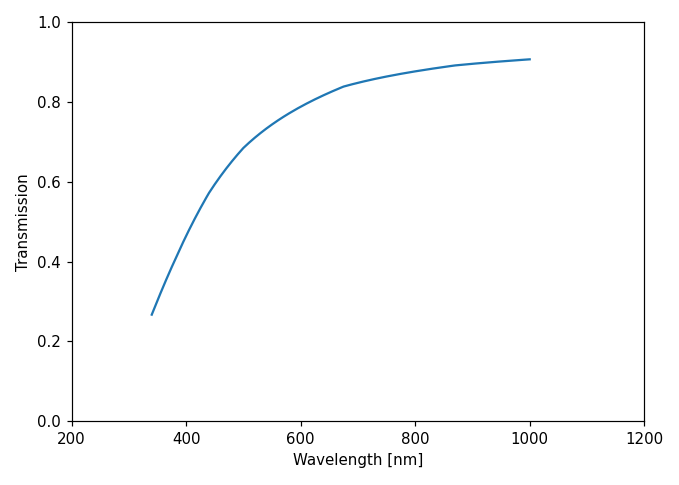

Text(0, 0.5, 'Transmission')

In [44]:
plt.figure(figsize=(7,5))
plt.plot(T.lam, T)
plt.ylim((0,1))
plt.xlim((200,1200))
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission')

### Comparison:
 - Blue = 53.1 deg zenith angle, identical to Morrill's alt=0 case
 

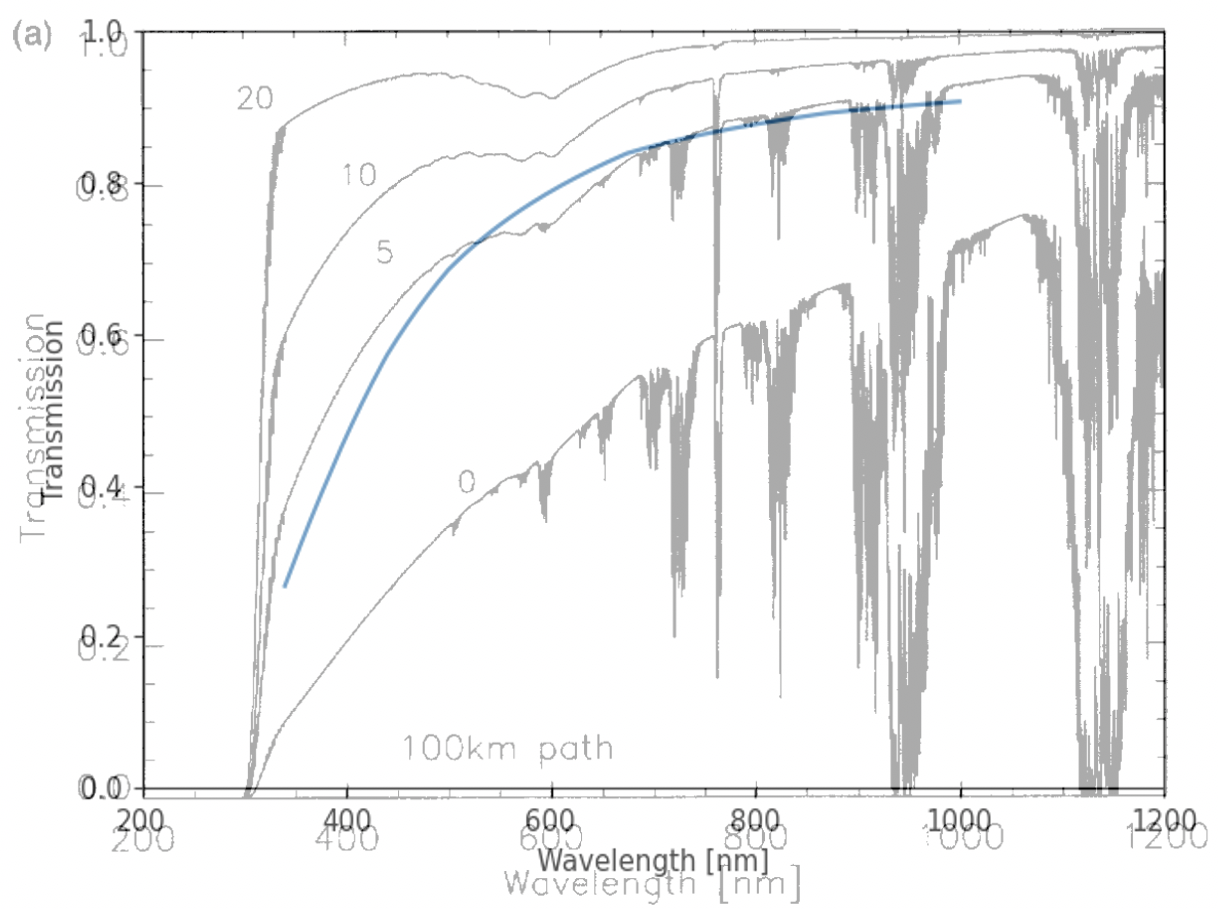